# Complex Queries and Basic Visualization

This notebook will cover how to make more complex queries, using both basic HTTP requests and using sharepa - the SHARE parsing and analysis library.

We'll also go over aggregations, or queries that will return summary statistics about the whole dataset. We'll use those aggregations to make some simple data visualizations using pandas and matplotlib.

## Setup

Here we'll define a helper function and specify the SHARE API url that we'll use for querying.

We'll also define another helper function to nicely print out our results.

In [1]:
import json
import requests

SHARE_API = 'https://staging-share.osf.io/api/search/abstractcreativework/_search'

def query_share(url, query):
    # A helper function that will use the requests library,
    # pass along the correct headers,
    # and make the query we want
    headers = {'Content-Type': 'application/json'}
    data = json.dumps(query)
    return requests.post(url, headers=headers, data=data, verify=False).json()

In [2]:
def print_numbered_results(results):
    print(
        'There are {} total results and {} results on this page'.format(
            results['hits']['total'],
            len(results['hits']['hits'])
        )
    )
    print('---------------')    
    for result in enumerate(results['hits']['hits']):
        print('{}. {}'.format(result[0] + 1, result[1]['_source']['title']))

## Complex Queries

### Pagination

One request to the SHARE API will return just 10 results by default. To get more results, you can use the "size" parameter in your request, or paginate through the results you get back.

In [3]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    }
}

query_results = query_share(SHARE_API, basic_query)

print_numbered_results(query_results)

There are 106 total results and 10 results on this page
---------------
1. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
2. New genus of diminutive microhylid frogs from Papua New Guinea
3. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
4. Two new frogs of the genus Platymantis (Anura: Ceratobatrachidae) from the Isabel Island group, Solomon Islands
5. A new species of Sycorax Curtis (Diptera, Psychodidae, Sycoracinae) collected on harlequin frogs (Anura: Bufonidae, Atelopus) in the Ecuadorian Andes
6. Two new fringe-limbed frogs of the genus Ecnomiohyla (Anura: Hylidae) from Panama
7. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
8. New species amongst Sri Lanka’s extinct shrub frogs (Amphib

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


We can get more results either by changing the number of results returned, or by paginating through the results.

First, we'll return 20 results by specifying the size in our query.

In [4]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    },
    "size": 20
}

query_results = query_share(SHARE_API, basic_query)

print_numbered_results(query_results)

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


There are 106 total results and 20 results on this page
---------------
1. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
2. New genus of diminutive microhylid frogs from Papua New Guinea
3. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
4. Two new frogs of the genus Platymantis (Anura: Ceratobatrachidae) from the Isabel Island group, Solomon Islands
5. A new species of Sycorax Curtis (Diptera, Psychodidae, Sycoracinae) collected on harlequin frogs (Anura: Bufonidae, Atelopus) in the Ecuadorian Andes
6. Two new fringe-limbed frogs of the genus Ecnomiohyla (Anura: Hylidae) from Panama
7. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
8. New species amongst Sri Lanka’s extinct shrub frogs (Amphib

We can also paginate through results by specifying the place to start in all of the results.

In [5]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    }
}

query_results = query_share(SHARE_API, basic_query)
print_numbered_results(query_results)

print('------------------------------------------')
print('*** Making another query for the next page ***')
print('*** These next titles will be different! ***')
print('------------------------------------------')

basic_query['from'] = 10  # Add the 'from' parameter to the query to pick up at the next page of results

query_results = query_share(SHARE_API, basic_query)
print_numbered_results(query_results)

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


There are 106 total results and 10 results on this page
---------------
1. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
2. New genus of diminutive microhylid frogs from Papua New Guinea
3. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
4. Two new frogs of the genus Platymantis (Anura: Ceratobatrachidae) from the Isabel Island group, Solomon Islands
5. A new species of Sycorax Curtis (Diptera, Psychodidae, Sycoracinae) collected on harlequin frogs (Anura: Bufonidae, Atelopus) in the Ecuadorian Andes
6. Two new fringe-limbed frogs of the genus Ecnomiohyla (Anura: Hylidae) from Panama
7. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
8. New species amongst Sri Lanka’s extinct shrub frogs (Amphib

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


There are 106 total results and 10 results on this page
---------------
1. Genomic imprinting or mutation and interclonal selection in triploid hybrid frogs? A comment on Tunner.
2. Dispersal rates and distances in adult water frogs, Rana lessonae, R. ridibunda  and their hybridogenetic associate R. esculenta
3. Patterns of natural selection on size at metamorphosis in water frogs.
4. The ecology of coexistence in two closely related species of frogs (rana)
5. Species boundaries among barred river frogs, Mixophyes (Anura: Myobatrachidae) in north­eastern Australia, with descriptions of two new species
6. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
7. Comparative larval morphology in Madagascan frogs of the genus Guibemantis (Amphibia: Mantellidae)
8. Evolutionary history of Lost World frogs
9. The evolution of colour in myobatrachid frogs
10. A taxonomic revision of frogs of the genu

### Pagination with sharepa

You can also use sharepa to paginate through all of the results in your query, and to access slices of your query at any time. The ShareSearch object returns a generator that you can use to access all results, using slices.

First, we'll redefine our helper function for nicer printing with data returned from sharepa.

In [6]:
def print_numbered_sharepa_results(search_obj):
    results = search_obj.execute()
    print(
        'There are {} total results and {} results on this page'.format(
            search_obj.count(),
            len(results.hits)
        )
    )
    print('---------------')    
    for result in enumerate(results.hits):
        print('{}. {}'.format(result[0] + 1, result[1]['title']))

In [7]:
from sharepa import ShareSearch
from sharepa.helpers import pretty_print

frogs_search = ShareSearch()

frogs_search = frogs_search.query(
    'query_string',
    query='frogs'
)

In [8]:
print_numbered_sharepa_results(frogs_search)

There are 106 total results and 10 results on this page
---------------
1. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
2. New genus of diminutive microhylid frogs from Papua New Guinea
3. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
4. Two new frogs of the genus Platymantis (Anura: Ceratobatrachidae) from the Isabel Island group, Solomon Islands
5. A new species of Sycorax Curtis (Diptera, Psychodidae, Sycoracinae) collected on harlequin frogs (Anura: Bufonidae, Atelopus) in the Ecuadorian Andes
6. Two new fringe-limbed frogs of the genus Ecnomiohyla (Anura: Hylidae) from Panama
7. Genetic evidence for human-mediated introduction of Anatolian water frogs (<i>Pelophylax</i> cf. <i>bedriagae</i>) to Cyprus (Amphibia: Ranidae)
8. New species amongst Sri Lanka’s extinct shrub frogs (Amphib

In [9]:
print_numbered_sharepa_results(frogs_search[10:20])

There are 106 total results and 10 results on this page
---------------
1. Genomic imprinting or mutation and interclonal selection in triploid hybrid frogs? A comment on Tunner.
2. Dispersal rates and distances in adult water frogs, Rana lessonae, R. ridibunda  and their hybridogenetic associate R. esculenta
3. Patterns of natural selection on size at metamorphosis in water frogs.
4. The ecology of coexistence in two closely related species of frogs (rana)
5. Species boundaries among barred river frogs, Mixophyes (Anura: Myobatrachidae) in north­eastern Australia, with descriptions of two new species
6. Reproductive features of three maternal-caring species of <i>Leptodactylus</i> (Anura: Leptodactylidae) with a report on alloparental care in frogs
7. Comparative larval morphology in Madagascan frogs of the genus Guibemantis (Amphibia: Mantellidae)
8. Evolutionary history of Lost World frogs
9. The evolution of colour in myobatrachid frogs
10. A taxonomic revision of frogs of the genu

### Aggregations

While searching for individual results is useful, sharepa also lets you make aggregation queries that give you results across the entirety of the SHARE dataset at once. This is useful if you're curious about the completeness of data sets.

For example, we can find the number of documents per source that are missing tags.

In [10]:
missing_tags_aggregation = {
    "query": {
        "bool": {
            "must_not": {
                "exists": {
                    "field": "tags"
                  }
            }
        }
    },
    "aggregations": {
        "sources": {
            "terms": {
                "field": "sources", # A field where the SHARE source is stored                
                "min_doc_count": 0, 
                "size": 0  # Will return all sources, regardless if there are results
            }
        }
    }
}

In [11]:
results_without_tags = query_share(SHARE_API, missing_tags_aggregation)

missing_tags_counts = results_without_tags['aggregations']['sources']['buckets']

for source in missing_tags_counts:
    print('{} has {} documents without tags'.format(source['key'], source['doc_count'], ))

providers.org.crossref has 10948 documents without tags
providers.gov.scitech has 648 documents without tags
providers.com.figshare has 1 documents without tags
providers.au.uow has 0 documents without tags
providers.be.ghent has 0 documents without tags
providers.ca.umontreal has 0 documents without tags
providers.com.nature has 0 documents without tags
providers.edu.asu has 0 documents without tags
providers.edu.boise_state has 0 documents without tags
providers.edu.calhoun has 0 documents without tags
providers.gov.nist has 0 documents without tags
providers.org.arxiv.oai has 0 documents without tags
providers.org.datacite has 0 documents without tags


/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


This information isn't terribly useful if we don't also know how many documents are in each source.

Let's get that information as well, along stats for what percentage of documents from each source are missing titles. 

We'll do this with an elasticsearch "sigificant terms" aggregation. We're only interested in results that have 1 document or more, meaning all documents from the other sources have titles.

In [12]:
no_tags_query = {
    "query": {
        "bool": {
            "must_not": {
                "exists": {
                    "field": "tags"
                  }
            }
        }
    },
    "aggs": {
        "sources":{
            "significant_terms":{
                "field": "sources", # A field where the SHARE source is stored                
                "min_doc_count": 0, 
                "size": 0,  # Will return all sources, regardless if there are results
                "percentage": {} # This will make the "score" parameter a percentage
            }
        }
    }
}

In [13]:
docs_with_no_tags_results = query_share(SHARE_API, no_tags_query)
docs_with_no_tags = docs_with_no_tags_results['aggregations']['sources']['buckets']

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [14]:
for source in docs_with_no_tags:
    print(
        '{}% (or {}/{}) of documents from {} have no tags'.format(
            format(source['score']*100, '.2f'),
            source['doc_count'],
            source['bg_count'],
            source['key']
        )
    )

100.00% (or 1/1) of documents from providers.com.figshare have no tags
99.87% (or 10948/10962) of documents from providers.org.crossref have no tags
44.78% (or 648/1447) of documents from providers.gov.scitech have no tags


#### Aggregations with sharepa

You can also use sharepa to do aggregations.

Let's make a sharepa search object that will give us the number of documents per sourcethat don't have language specified.

In [15]:
no_language_search = ShareSearch()

no_language_search = no_language_search.query(
    'bool',
    must_not={"exists": {"field": "language"}}
)

no_language_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'significant_terms',  # There are many kinds of aggregations
    field='sources',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='sources', min_doc_count=1, percentage={}, size=0)

We can see which query is actually going to be sent to elasticsearch by printing out the query. This is very similar to the queries we were defining by hand up above.

In [16]:
pretty_print(no_language_search.to_dict())

{
    "query": {
        "bool": {
            "must_not": [
                {
                    "exists": {
                        "field": "language"
                    }
                }
            ]
        }
    },
    "aggs": {
        "sources": {
            "significant_terms": {
                "percentage": {},
                "field": "sources",
                "size": 0,
                "min_doc_count": 1
            }
        }
    }
}


In [17]:
aggregated_results = no_language_search.execute()

for source in aggregated_results.aggregations['sources']['buckets']:
    print(
        '{}% of documents from {} do not have language'.format(
            format(source['score']*100, '.2f'),
            source['key'] 
        )
    )

100.00% of documents from providers.au.uow do not have language
100.00% of documents from providers.com.figshare do not have language
100.00% of documents from providers.gov.nist do not have language
100.00% of documents from providers.edu.boise_state do not have language
99.87% of documents from providers.org.crossref do not have language
99.64% of documents from providers.org.arxiv.oai do not have language
94.03% of documents from providers.edu.asu do not have language
76.32% of documents from providers.edu.calhoun do not have language
56.66% of documents from providers.org.datacite do not have language
41.10% of documents from providers.be.ghent do not have language
20.00% of documents from providers.ca.umontreal do not have language
0.43% of documents from providers.gov.scitech do not have language


### Top tags 

Let's do an elasticsearch query to find out what the most used tags are used in the dataset across all sources.

In [18]:
top_tag_search = ShareSearch()

top_tag_search.aggs.bucket(
    'tagsTermFilter',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations
    field='tags',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    exclude= "of|and|or",
    size=10
)

# pretty_print(top_tag_search.to_dict())

top_tag_results_executed = top_tag_search.execute()
top_tag_results = top_tag_results_executed.aggregations.tagsTermFilter.to_dict()['buckets']

pretty_print(top_tag_results)

[
    {
        "key": "dataset",
        "doc_count": 403057
    },
    {
        "key": "text",
        "doc_count": 358318
    },
    {
        "key": "ethz",
        "doc_count": 310978
    },
    {
        "key": "cdl",
        "doc_count": 285391
    },
    {
        "key": "tib",
        "doc_count": 257715
    },
    {
        "key": "image",
        "doc_count": 252736
    },
    {
        "key": "application",
        "doc_count": 212269
    },
    {
        "key": "cdl.digsci",
        "doc_count": 164037
    },
    {
        "key": "pdf",
        "doc_count": 152197
    },
    {
        "key": "bild",
        "doc_count": 130861
    }
]


## Basic Plotting

Sharepa has some basic functions to get you started making plots using matplotlib and pandas.

### Creating a dataframe from sharepa data

Raw sharepa data is in the same format as elasticsearch results, represented as a nested structure. To convert the data into a format that pandas can recognize, we have to convert it into a dataframe.

Let's take our top tags aggregation, make it into a pandas data frame, and plot a bar graph. Then, we'll plot the results.

In [19]:
import pandas as pd

top_tags_dataframe = pd.DataFrame(top_tag_results)
top_tags_dataframe

,doc_count,key
0,403057,dataset
1,358318,text
2,310978,ethz
3,285391,cdl
4,257715,tib
5,252736,image
6,212269,application
7,164037,cdl.digsci
8,152197,pdf
9,130861,bild


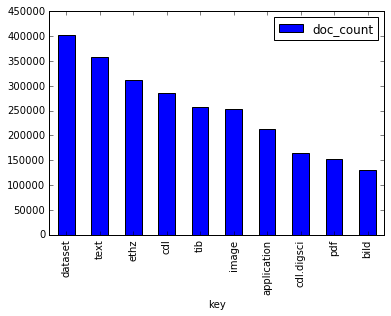

In [20]:
from matplotlib import pyplot
%matplotlib inline

top_tags_dataframe.plot(kind='bar', x='key', y='doc_count')
pyplot.show()

### Complex Queries and Dataframes

Let's plot the number of document that each source has. We'll limit it to the top 30 sources to make sure that the graph is readable. Here we'll use the sharepa helper function bucket_to_dataframe()

/Users/erin/miniconda3/envs/share_tutorials/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


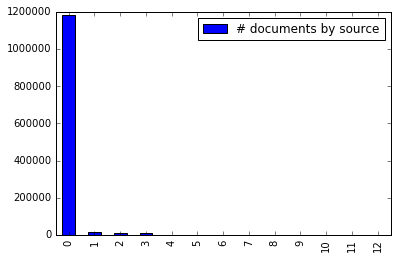

In [21]:
from sharepa import bucket_to_dataframe

all_results = ShareSearch()

all_results = all_results.query(
    'query_string', # Type of query, will accept a lucene query string
    query='*', # This lucene query string will find all documents that don't have tags
    analyze_wildcard=True  # This will make elasticsearch pay attention to the asterisk (which matches anything)
)

all_results.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations, terms is a pretty useful one though
    field='sources',  # We store the source of a document in its type, so this will aggregate by source
    size=0,  # These are just to make sure we get numbers for all the sources, to make it easier to combine graphs
    min_doc_count=0
)

all_results = all_results.execute()

all_results_frame = bucket_to_dataframe('# documents by source', all_results.aggregations.sources.buckets)
all_results_frame_sorted = all_results_frame.sort(ascending=False,  columns='# documents by source')
all_results_frame_sorted[:30].plot(kind='bar')

We can choose different types of plots to generate. Here, we'll make a pie chart of the data sources with the top 10 most results.

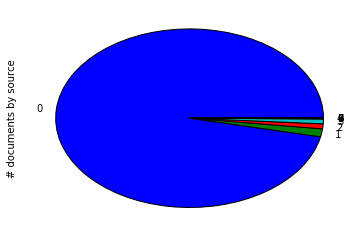

In [22]:
all_results_frame_sorted[:10].plot(kind='pie', y="# documents by source", legend=False)